# Necessary imports

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [36]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

# Understanding the data more

In [37]:
print(train_df.shape)
print(test_df.shape)
print(sub.shape)

(8693, 14)
(4277, 13)
(4277, 2)


In [38]:
print(f'{train_df.info()}')
print(f'Column Names : {train_df.columns}')
print(f'For Null checking :{train_df.isnull().sum()}')
print(f'For Duplicates : {train_df.duplicated().sum()}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
Column Names : Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 

In [39]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [40]:
train_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [41]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


# EDA

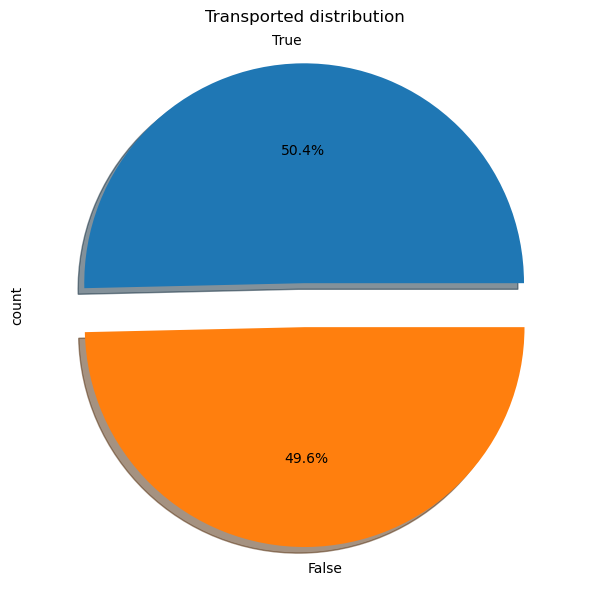

In [42]:
plt.figure(figsize = (8,6))
train_df['Transported'].value_counts().plot.pie(autopct = '%1.1f%%', explode = [0.1,0.1], shadow = True).set_title('Transported distribution')
plt.tight_layout()
plt.show()


In [43]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

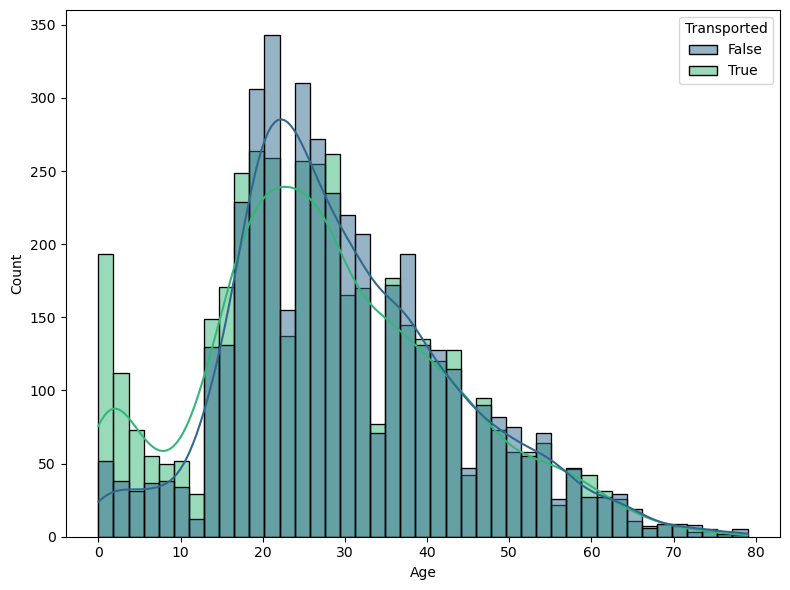

In [44]:
plt.figure(figsize = (8,6))
sns.histplot(x = 'Age', hue = 'Transported', palette = 'viridis', kde = True, data = train_df)
plt.tight_layout()
plt.show()

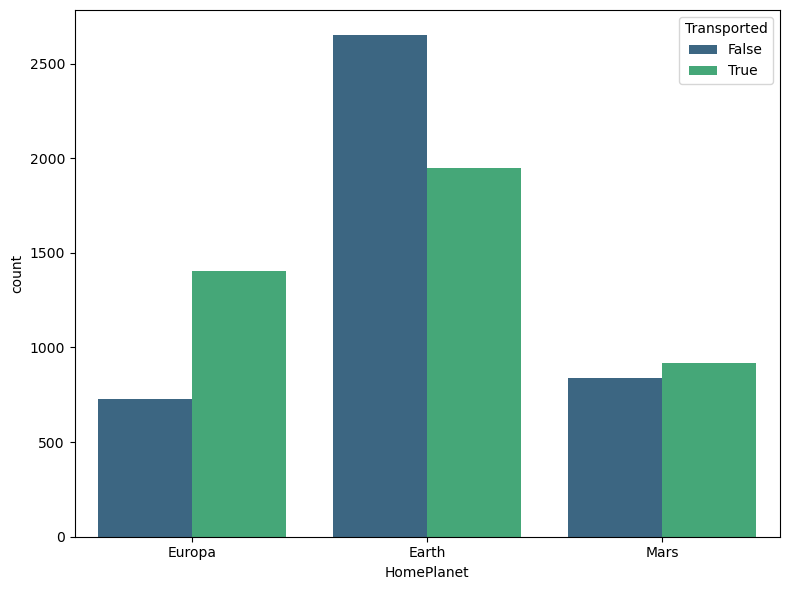

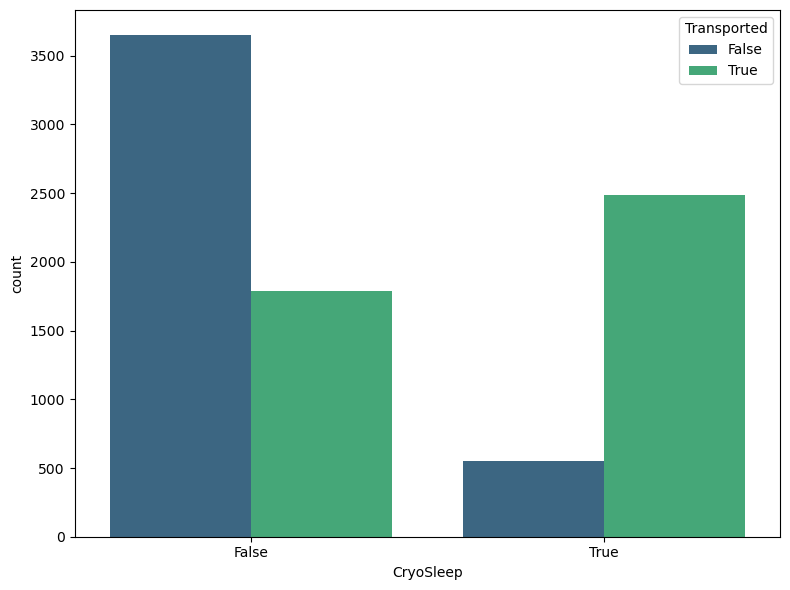

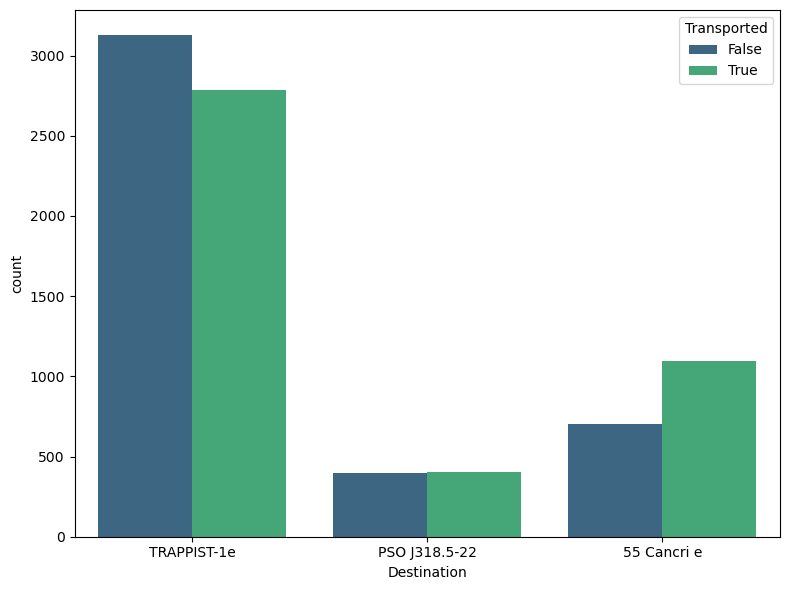

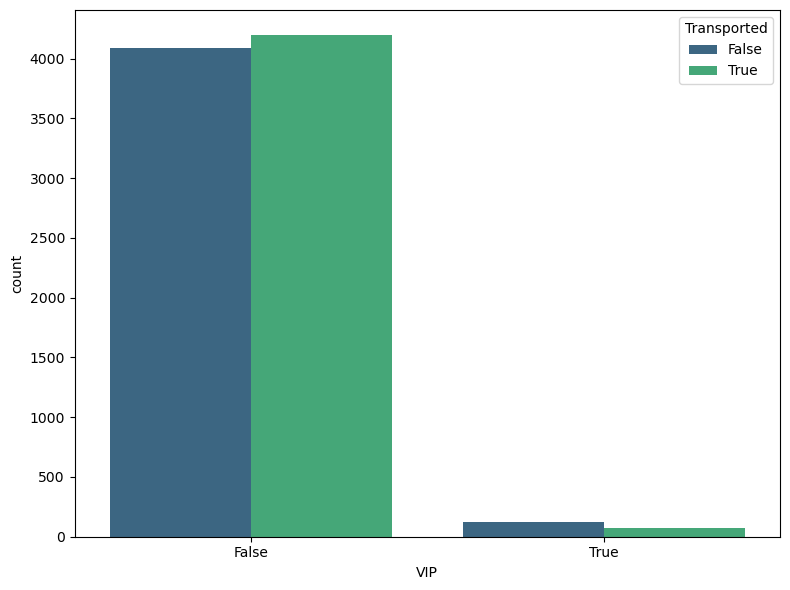

In [45]:
categorical_col = [
    'HomePlanet',
    'CryoSleep',
    'Destination',
    'VIP'
]

for column in categorical_col:
    plt.figure(figsize = (8,6))
    sns.countplot(x = column, data = train_df, hue = train_df['Transported'], palette='viridis')
    plt.tight_layout()
    plt.show()

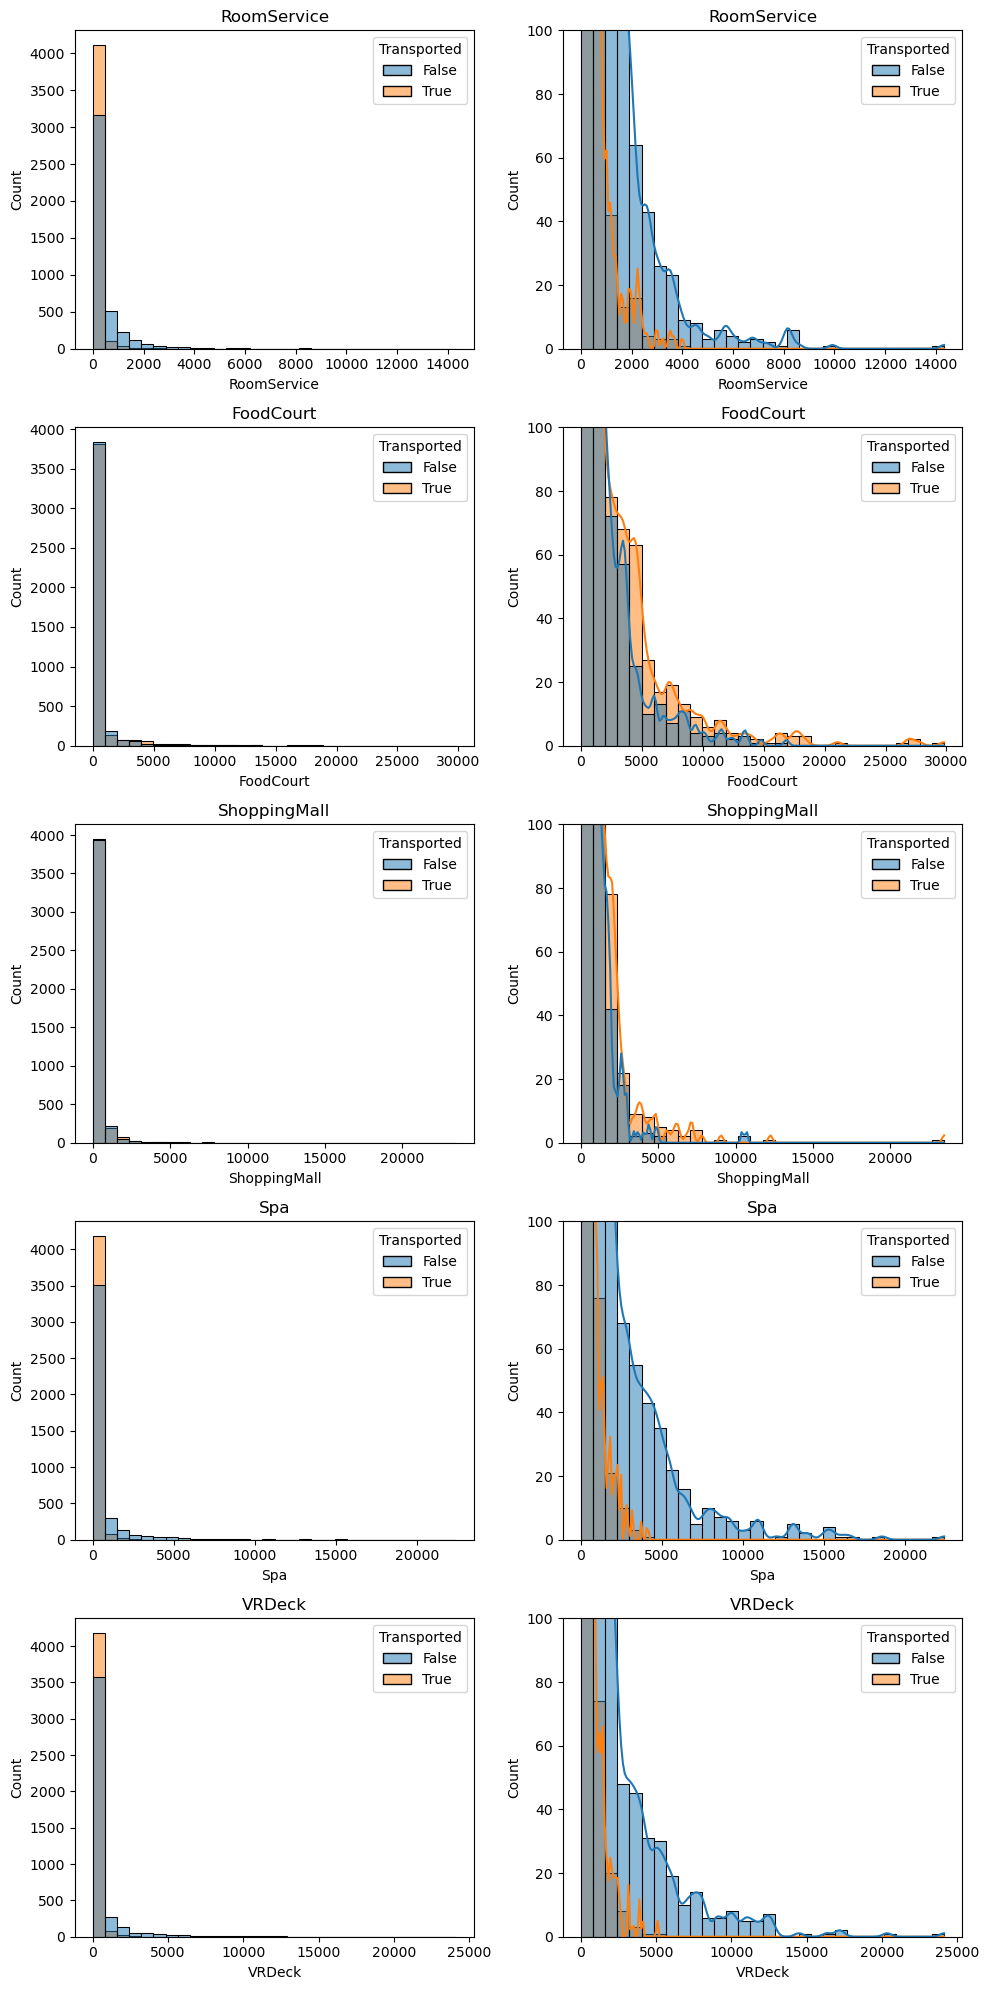

In [46]:
exp_col = [
     'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'
]

fig = plt.figure(figsize=(10,20))

for i , item in enumerate(exp_col):
    # left side
    ax = plt.subplot(5,2,i*2+1)
    sns.histplot(data=train_df, axes = ax , x = item, bins=30, kde = False, hue = "Transported")
    ax.set_title(item)

    # right side
    ax = plt.subplot(5,2 ,2*i+2)
    sns.histplot(data=train_df, axes = ax , x = item, bins=30, kde = True, hue = "Transported")
    plt.ylim([0,100])
    ax.set_title(item)
plt.tight_layout()
plt.show()

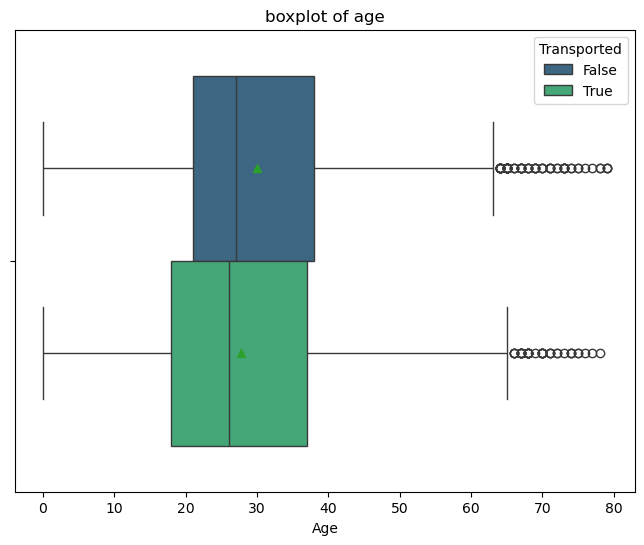

In [47]:
plt.figure(figsize=(8,6))
sns.boxplot(x= 'Age', data = train_df, hue = 'Transported', palette='viridis', showmeans = True)
plt.title('boxplot of age')
plt.show()

Text(0.5, 1.0, 'age distribution in gtoups')

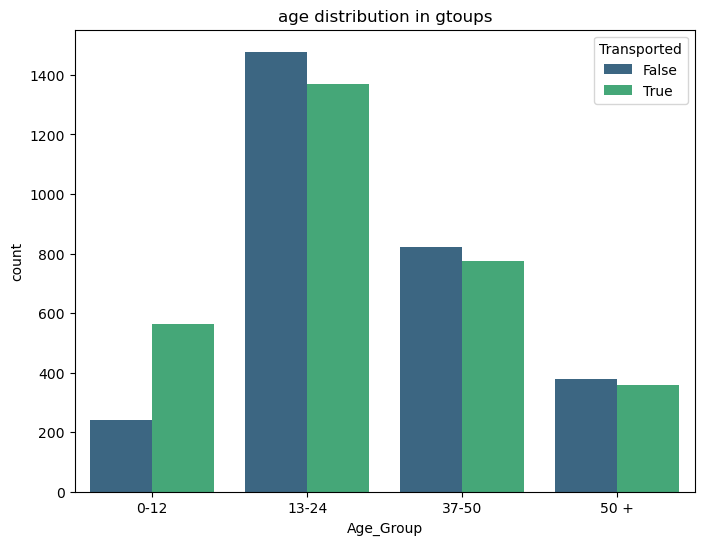

In [48]:
# for train
train_df['Age_Group'] = np.nan
train_df.loc[train_df['Age']<=12, 'Age_Group'] = '0-12'
train_df.loc[(train_df['Age']>12) & (train_df['Age']<=24), 'Age_Group'] = '13-24'
train_df.loc[(train_df['Age']>24) & (train_df['Age']<=36), 'Age_Group'] = '25-36'
train_df.loc[(train_df['Age']>36) & (train_df['Age']<=50), 'Age_Group'] = '37-50'
train_df.loc[train_df['Age']>50, 'Age_Group'] = '50 +'

plt.figure(figsize=(8,6))
sns.countplot(x= 'Age_Group', data = train_df, hue = 'Transported', palette='viridis', order=[ '0-12','13-24','37-50' ,'50 +'])
plt.title("age distribution in gtoups")

In [49]:
train_df = train_df.drop(columns='Age_Group', axis=1)

In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [51]:
## FOr train

# for numerical

train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['RoomService'].fillna(train_df['RoomService'].median(), inplace=True)
train_df['FoodCourt'].fillna(train_df['FoodCourt'].median(), inplace=True)
train_df['ShoppingMall'].fillna(train_df['ShoppingMall'].median(), inplace=True)
train_df['Spa'].fillna(train_df['Spa'].median(), inplace=True)
train_df['VRDeck'].fillna(train_df['VRDeck'].median(), inplace=True)

# for categorical

train_df['HomePlanet'].fillna(train_df['HomePlanet'].mode()[0], inplace=True)
train_df['CryoSleep'].fillna(train_df['CryoSleep'].mode()[0], inplace=True)
train_df['Cabin'].fillna(train_df['Cabin'].mode()[0], inplace=True)
train_df['Destination'].fillna(train_df['Destination'].mode()[0], inplace=True)
train_df['VIP'].fillna(train_df['VIP'].mode()[0], inplace=True)


# FOr test

# for numerical

test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['RoomService'].fillna(test_df['RoomService'].median(), inplace=True)
test_df['FoodCourt'].fillna(test_df['FoodCourt'].median(), inplace=True)
test_df['ShoppingMall'].fillna(test_df['ShoppingMall'].median(), inplace=True)
test_df['Spa'].fillna(test_df['Spa'].median(), inplace=True)
test_df['VRDeck'].fillna(test_df['VRDeck'].median(), inplace=True)


# for categorical
test_df['Name'].fillna(test_df['Name'].mode()[0], inplace=True)
test_df['HomePlanet'].fillna(test_df['HomePlanet'].mode()[0], inplace=True)
test_df['CryoSleep'].fillna(test_df['CryoSleep'].mode()[0], inplace=True)
test_df['Cabin'].fillna(test_df['Cabin'].mode()[0], inplace=True)
test_df['Destination'].fillna(test_df['Destination'].mode()[0], inplace=True)
test_df['VIP'].fillna(test_df['VIP'].mode()[0], inplace=True)

In [52]:
Home_Planet = {
    'Europa':0,
    'Earth' :1,
    'Mars': 2
}

Cryo_Sleep = {
    False : 0,
    True : 1
}
Destination_map = {
    'TRAPPIST-1e' : 0,
    'PSO J318.5-22': 1,
    '55 Cancri e': 2
}
VIP_map = {
    False: 0,
    True: 1
}

transpo = {
    False: 0,
    True : 1
}


train_df['HomePlanet'] = train_df['HomePlanet'].map(Home_Planet)
train_df['CryoSleep'] = train_df['CryoSleep'].map(Cryo_Sleep)
train_df['Destination'] = train_df['Destination'].map(Destination_map)
train_df['VIP'] = train_df['VIP'].map(VIP_map)
train_df['Transported'] = train_df['Transported'].map(transpo)

test_df['HomePlanet'] = test_df['HomePlanet'].map(Home_Planet)
test_df['CryoSleep'] = test_df['CryoSleep'].map(Cryo_Sleep)
test_df['Destination'] = test_df['Destination'].map(Destination_map)
test_df['VIP'] = test_df['VIP'].map(VIP_map)

In [53]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,0,0,B/0/P,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,1,0,F/0/S,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,0,0,A/0/S,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,0,0,A/0/S,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,1,0,F/1/S,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [69]:

from sklearn.model_selection import cross_val_score , GridSearchCV, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.metrics import accuracy_score

from sklearn.ensemble import  AdaBoostClassifier , GradientBoostingClassifier

In [55]:

X = train_df.drop(columns='Transported', axis=1).copy()
y = train_df['Transported'].copy()
x_test = test_df

X.drop(['PassengerId','Cabin','Name'], axis=1, inplace=True)
x_test.drop(['PassengerId','Cabin','Name'], axis=1, inplace=True)


In [56]:
numeric_features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_features= []

preprocessor = make_column_transformer(
    (OneHotEncoder(drop='if_binary',handle_unknown='ignore'), categorical_features),
    (StandardScaler(), numeric_features),
    remainder='passthrough'
)

X = preprocessor.fit_transform(X)
x_test = preprocessor.transform(x_test)

print('Training set shape:', X.shape)

Training set shape: (8693, 10)


In [57]:
classifiers = {
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=0),
    'AdaBoostClassifier' : AdaBoostClassifier(random_state=0),
}

Gradi_grid = {
        "n_estimators": [50, 100, 200, 500],
        "learning_rate": [0.01, 0.1, 0.05],
        "max_depth": [3, 5, 7],
}

Ada_grid = {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.5],
}

grid = {
    'GradientBoostingClassifier': Gradi_grid,
    'AdaBoostClassifier' : Ada_grid,

}

In [58]:
# traintest split for validation
x_train,x_valid,y_train,y_valid = train_test_split(X,y, stratify=y, test_size=0.2, train_size=0.8,random_state=0)

In [59]:
i = 0
clf_best_params = {}
scores_list = []

for i, (key, classifier) in enumerate(classifiers.items()):
    clf = GridSearchCV(
        estimator=classifier,
        param_grid=grid[key],
        n_jobs=2,
        cv=None,
        error_score='raise'
    )
    clf.fit(x_train, y_train)
    score = clf.score(x_valid, y_valid)
    scores_list.append({'Classifier': key, 'Validation_Score': score})
    clf_best_params[key] = clf.best_params_

    print('Model:', key)
    i += 1
valid_scor = pd.DataFrame(scores_list)

Model: GradientBoostingClassifier
Model: AdaBoostClassifier


In [60]:
valid_scor

,Classifier,Validation_Score
0,GradientBoostingClassifier,0.780909
1,AdaBoostClassifier,0.791259


In [61]:
clf_best_params

{'GradientBoostingClassifier': {'learning_rate': 0.01,
  'max_depth': 7,
  'n_estimators': 200},
 'AdaBoostClassifier': {'learning_rate': 0.5, 'n_estimators': 100}}

In [76]:
best_classifiers = {
    "AdaBoostClassifier" : AdaBoostClassifier(**clf_best_params["AdaBoostClassifier"], random_state=0),
    "GradientBoostingClassifier" : GradientBoostingClassifier(**clf_best_params["GradientBoostingClassifier"], random_state=0)
}

In [77]:
FOLDS = 10
preds = np.zeros(len(x_test))

for key, classifier in best_classifiers.items():
    cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=0)
    score = 0

    # Perform cross validation
    for train_idx, val_idx in cv.split(X, y):
        # Split data
        x_train, x_valid = X[train_idx], X[val_idx]
        y_train, y_valid = y[train_idx], y[val_idx]

        # Train and predict
        classifier.fit(x_train, y_train)
        preds += classifier.predict_proba(x_test)[:,1]
        score += classifier.score(x_valid, y_valid)

    # Print results
    print(f'Model: {key}')
    print(f'Average validation accuracy: {(100 * score/FOLDS):.2f}%\n')

# Average predictions across folds and classifiers
preds /= (FOLDS * len(best_classifiers))

Model: AdaBoostClassifier
Average validation accuracy: 78.95%

Model: GradientBoostingClassifier
Average validation accuracy: 79.77%



Text(0.5, 0, 'Probability')

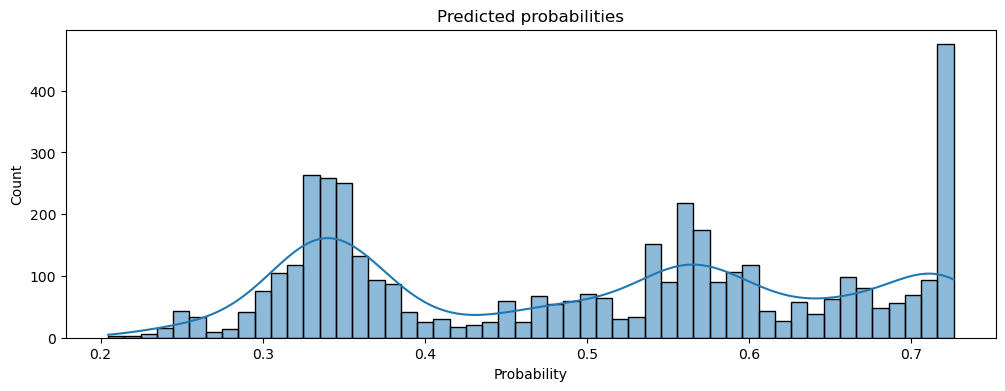

In [80]:
plt.figure(figsize=(12,4))
sns.histplot(preds, binwidth=0.01, kde=True)
plt.title('Predicted probabilities')
plt.xlabel('Probability')

In [75]:
# test_id = sub['PassengerId']

# output = pd.DataFrame({
#     'PassengerId' : test_id,
#     'Transported' : preds
#     })
# output.replace({'Transported': {1 : "False"} }, inplace=True)
# output.replace({'Transported': {0 : "True"} }, inplace=True)
# output.to_csv('To_submission.csv', index=False)
# output.head()

code that threw error

In [62]:

# i = 0

# best_params = classifiers.copy()

# valid_scor = pd.DataFrame({
#     "Classifier" : classifiers.keys(),
#     'Validation_Score' : np.zeros(len(classifiers))
# })

# for key, classifer in classifiers.items():
#     clf = GridSearchCV(
#         estimator=classifer,
#         param_grid=grid[key],
#         n_jobs=2,
#         cv= None,
#         error_score='raise'

#     )

#     clf.fit(x_train,y_train)

#     valid_scor.iloc[i,1] = clf.score(x_valid,y_valid)

#     best_params[key] = best_params
#     print('Model:', key)
#     print('Training time (mins):', valid_scor.iloc[i,2])
#     print('')
#     i += 1

In [81]:
# def model_evaluation_and_prediction(preprocessor,x_train,y_train, x_test, model):

#     pipe = make_pipeline(preprocessor,model)

#     # Perform cross-validation on the training set
#     cv_scores = cross_val_score(pipe, x_train,y_train, cv=10, scoring='accuracy')

#     # Print the cross-validation results
#     print(f'For the model: [{model.__class__.__name__}]:')
#     print(f'Cross validation scores: {cv_scores}')
#     print(f'Standard deviation of cross-validation scores: {cv_scores.std():.4f}')
#     print(f'Mean of cross-validation scores: {cv_scores.mean():.4f}')

#     # Fit the model on the entire training data
#     pipe.fit(x_train,y_train)

#     # Make predictions on the test set
#     ypred = pipe.predict(x_test)

#     return ypred

# # List of models to evaluate
# models = [
#     GradientBoostingClassifier(n_estimators=200, learning_rate=0.01, max_depth = 7),
#     AdaBoostClassifier(n_estimators=100, learning_rate=0.5)
# ]

# # Iterate over the models and evaluate them
# for model in models:
#     model_evaluation_and_prediction(preprocessor,x_train,y_train, x_test, model)
